# Unity Banana Navigation

## Import packages

In [1]:
import random
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
from unityagents import UnityEnvironment
import numpy as np
from dqn_agent import Agent
from datetime import datetime as dt

## Create Unity environment

The Unity env will open in a new window. Once you start training or testing your agent, you will see your agent's pov in this window as it navigates the virtual environment.

In [2]:
env = UnityEnvironment(file_name="Banana")
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

env_info = env.reset(train_mode=True)[brain_name]
action_size = brain.vector_action_space_size
state = env_info.vector_observations[0]
state_size = len(state)

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


## DQN Function

This function will run or train the agent. If the agent will reach average score of 13.0 over 100 consecutive episodes it will save the learned weights to the `checkpoint_dqn.pth` file. You can read this weights while initializing new agent to run trained agent

In [3]:
def navigate(agent, n_episodes=1000, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.995, train=True, experiment=False):
    """Deep Q-Learning.
    
    Args
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
        train (bool): flag deciding if the agent will train or just play through the episode
    """
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    max_avg_score = 0                  # stores max recorded average score over a 100 episode window
    eps = eps_start                    # initialize epsilon
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=train)[brain_name]
        state = env_info.vector_observations[0]
        score = 0
        for t in range(max_t):
            action = agent.act(state, eps if train else 0.0)
            env_info = env.step(action)[brain_name]
            next_state = env_info.vector_observations[0]   # get the next state
            reward = env_info.rewards[0]                   # get the reward
            done = env_info.local_done[0]                  # see if episode has finished
            if train:
                agent.step(state, action, reward, next_state, done)
            score += reward                                # update the score
            state = next_state                             # roll over the state to next time step
            if done:                                       # exit loop if episode finished
                break
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
        average_score = np.mean(scores_window)
        if average_score >= 13.0 and train and average_score >= max_avg_score:
            if max_avg_score == 0 :
                print('\nEnvironment solved in {:d} episodes!\n\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
            print('\nSaving current network state.')
            if experiment:
                torch.save(agent.qnetwork_local.state_dict(), 'navigate_{0}_{1}.pth'.format(np.mean(scores_window).replace('.',''),dt.now().strftime('%y%b%d%H%M%S')))
            else:
                torch.save(agent.qnetwork_local.state_dict(), 'experiments/checkpoint_dqn.pth')
            max_avg_score = average_score
    return scores

 ## Train the agent

In the following code block, after initialising an agent to navigate the unity banana environment, the agent will train over a period of 10,000 episodes. It will start out as a highly exploratory agent but as it learns how to navigate the environment it will become greedier using an epsilon decay rate of 0.995. As the agent learns to navigate the environment, the average score of the agent over a 100 episode sliding window will be tracked and the DQN state when the average score is the highest will be saved as checkpoint_dqn.pth.


-----Training for 10000 episodes using decay rate of 0.995-----

Episode 100	Average Score: 0.03
Episode 200	Average Score: 0.60
Episode 300	Average Score: 3.22
Episode 400	Average Score: 7.28
Episode 500	Average Score: 10.84
Episode 600	Average Score: 12.26
Episode 694	Average Score: 13.02
Environment solved in 594 episodes!
	Average Score: 13.02

Saving current network state.
Episode 695	Average Score: 13.04
Saving current network state.
Episode 696	Average Score: 13.06
Saving current network state.
Episode 697	Average Score: 13.16
Saving current network state.
Episode 700	Average Score: 13.11
Episode 701	Average Score: 13.17
Saving current network state.
Episode 702	Average Score: 13.22
Saving current network state.
Episode 718	Average Score: 13.33
Saving current network state.
Episode 719	Average Score: 13.36
Saving current network state.
Episode 720	Average Score: 13.38
Saving current network state.
Episode 723	Average Score: 13.43
Saving current network state.
Episode 725	Averag

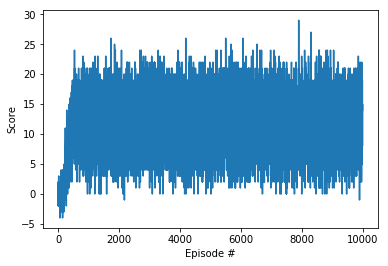

In [4]:
agent = Agent(state_size=state_size, action_size=action_size, seed=0)
n_episodes = 10000
eps_decay  = 0.995
print('\n-----Training for {0} episodes using decay rate of {1}-----\n'.format(n_episodes,eps_decay))
scores = navigate(agent = agent, n_episodes = n_episodes, eps_decay = eps_decay)

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.savefig('images/average_scores_plot_{0}_{1}.png'.format(n_episodes,eps_decay))
plt.show()

## Experimenting with Hyperparameters

### Epsilon-decay Rate

To see how the rate of epsilon decay impacts learning, I ran an experiment to plot the average scores achieved by the agent over a period of 1000 episodes for 10 monotonically decreasing epsilon decay rates. Since in this case we are exprimenting, the DQN state will be saved if the agent achieves an average score of higher than 13, the DQN network state will be saved in the checkpoints folder but will not overwrite the state saved as checkpoint_dqn.pth.


-----Training for 1000 episodes using decay rate of 0.999-----

Episode 100	Average Score: -0.04
Episode 200	Average Score: 0.682
Episode 300	Average Score: 1.90
Episode 400	Average Score: 2.68
Episode 500	Average Score: 3.58
Episode 600	Average Score: 4.03
Episode 700	Average Score: 4.52
Episode 800	Average Score: 4.96
Episode 900	Average Score: 6.41
Episode 1000	Average Score: 6.55


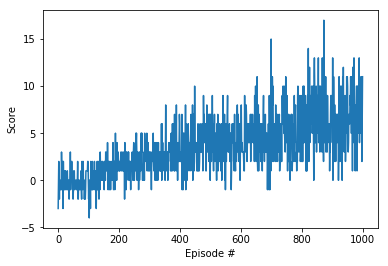


-----Training for 1000 episodes using decay rate of 0.998-----

Episode 100	Average Score: 0.48
Episode 200	Average Score: 2.08
Episode 300	Average Score: 3.58
Episode 400	Average Score: 4.75
Episode 500	Average Score: 6.60
Episode 600	Average Score: 7.80
Episode 700	Average Score: 7.85
Episode 800	Average Score: 8.92
Episode 900	Average Score: 8.01
Episode 1000	Average Score: 9.51


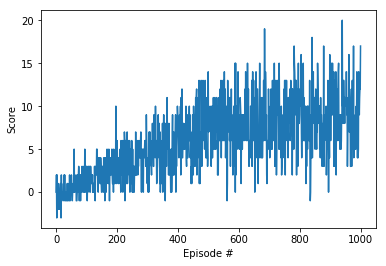


-----Training for 1000 episodes using decay rate of 0.997-----

Episode 100	Average Score: 1.03
Episode 200	Average Score: 3.49
Episode 300	Average Score: 5.35
Episode 400	Average Score: 6.89
Episode 500	Average Score: 7.81
Episode 600	Average Score: 10.13
Episode 700	Average Score: 10.21
Episode 800	Average Score: 8.841
Episode 900	Average Score: 9.37
Episode 1000	Average Score: 9.73


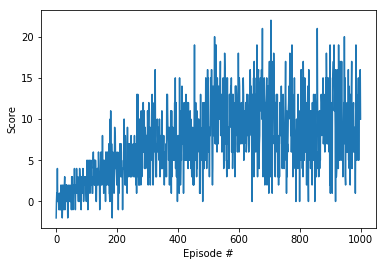


-----Training for 1000 episodes using decay rate of 0.996-----

Episode 100	Average Score: 1.45
Episode 200	Average Score: 4.59
Episode 300	Average Score: 6.45
Episode 400	Average Score: 7.14
Episode 500	Average Score: 8.37
Episode 600	Average Score: 8.91
Episode 700	Average Score: 9.59
Episode 800	Average Score: 10.32
Episode 900	Average Score: 10.99
Episode 1000	Average Score: 10.51


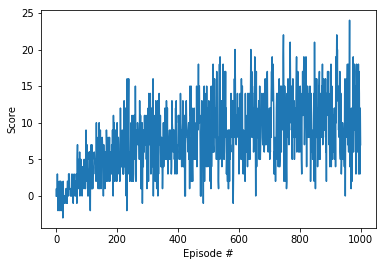


-----Training for 1000 episodes using decay rate of 0.995-----

Episode 100	Average Score: 1.78
Episode 200	Average Score: 5.42
Episode 300	Average Score: 7.76
Episode 400	Average Score: 7.97
Episode 500	Average Score: 8.45
Episode 600	Average Score: 10.06
Episode 700	Average Score: 10.24
Episode 800	Average Score: 10.61
Episode 900	Average Score: 11.05
Episode 1000	Average Score: 9.83


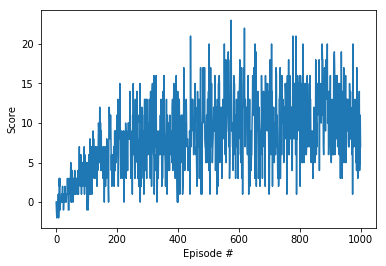


-----Training for 1000 episodes using decay rate of 0.994-----

Episode 100	Average Score: 1.90
Episode 200	Average Score: 6.80
Episode 300	Average Score: 9.04
Episode 400	Average Score: 9.51
Episode 500	Average Score: 9.35
Episode 600	Average Score: 8.95
Episode 700	Average Score: 9.60
Episode 800	Average Score: 11.84
Episode 900	Average Score: 11.21
Episode 1000	Average Score: 11.77


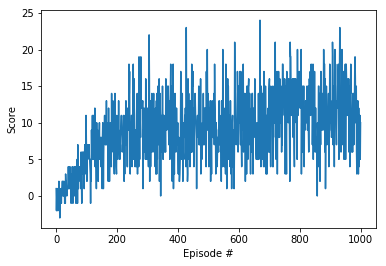


-----Training for 1000 episodes using decay rate of 0.993-----

Episode 100	Average Score: 2.49
Episode 200	Average Score: 7.76
Episode 300	Average Score: 9.59
Episode 400	Average Score: 11.25
Episode 500	Average Score: 10.74
Episode 600	Average Score: 10.57
Episode 700	Average Score: 11.19
Episode 800	Average Score: 10.63
Episode 900	Average Score: 12.10
Episode 1000	Average Score: 11.77


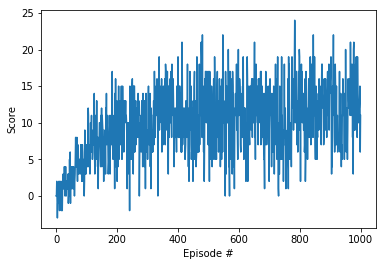


-----Training for 1000 episodes using decay rate of 0.992-----

Episode 100	Average Score: 2.24
Episode 200	Average Score: 7.52
Episode 300	Average Score: 9.54
Episode 400	Average Score: 9.522
Episode 500	Average Score: 11.33
Episode 600	Average Score: 12.05
Episode 700	Average Score: 12.00
Episode 800	Average Score: 10.31
Episode 900	Average Score: 10.69
Episode 1000	Average Score: 10.74


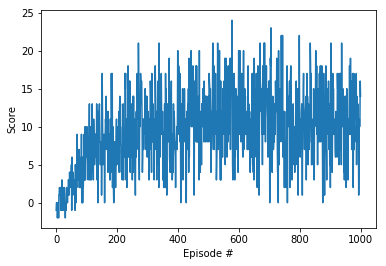


-----Training for 1000 episodes using decay rate of 0.991-----

Episode 100	Average Score: 3.09
Episode 200	Average Score: 8.72
Episode 300	Average Score: 10.34
Episode 400	Average Score: 10.74
Episode 500	Average Score: 10.23
Episode 600	Average Score: 11.44
Episode 700	Average Score: 11.14
Episode 800	Average Score: 10.55
Episode 900	Average Score: 10.41
Episode 1000	Average Score: 10.91


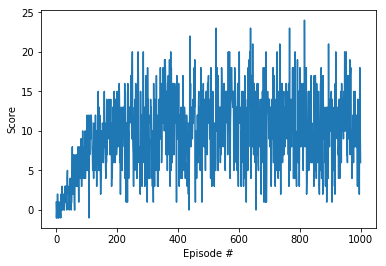

In [5]:
n_episodes = 1000
for eps_decay in [float(j)/1000 for j in range(999,990,-1)]:
    print('\n-----Training for {0} episodes using decay rate of {1}-----\n'.format(n_episodes, eps_decay))
    scores = navigate(agent = agent, n_episodes = n_episodes, eps_decay = eps_decay, experiment = True)

    # plot the scores
    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.plot(np.arange(len(scores)), scores)
    plt.ylabel('Score')
    plt.xlabel('Episode #')
    plt.savefig('images/average_scores_plot_{}_{}.png'.format(n_episodes,eps_decay))
    plt.show()

### DNN Architecture

To see varying the number of hidden layers impacted the learning of the agent, I ran an experiment to plot the average scores achieved by the agent over a period of 1000 episodes for 3 different architectures:
- One Hidden Layer - [64] 
- Three Hidden layers - [256,128,64]
- Two Hidden Layers - [16,8]


-----Training for 1000 episodes with [64] hidden layers-----

Episode 100	Average Score: 0.06
Episode 200	Average Score: 1.30
Episode 300	Average Score: 3.71
Episode 400	Average Score: 8.35
Episode 500	Average Score: 10.63
Episode 600	Average Score: 12.15
Episode 700	Average Score: 12.74
Episode 718	Average Score: 13.01
Environment solved in 618 episodes!
	Average Score: 13.01

Saving current network state.
Episode 719	Average Score: 13.07
Saving current network state.
Episode 722	Average Score: 13.16
Saving current network state.
Episode 723	Average Score: 13.18
Saving current network state.
Episode 724	Average Score: 13.21
Saving current network state.
Episode 725	Average Score: 13.22
Saving current network state.
Episode 726	Average Score: 13.24
Saving current network state.
Episode 727	Average Score: 13.24
Saving current network state.
Episode 728	Average Score: 13.26
Saving current network state.
Episode 729	Average Score: 13.27
Saving current network state.
Episode 732	Average S

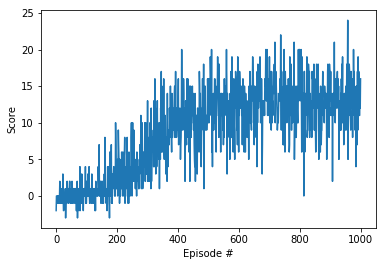


-----Training for 1000 episodes with [256,128,64] hidden layers-----

Episode 100	Average Score: 0.29
Episode 200	Average Score: 3.32
Episode 300	Average Score: 7.16
Episode 400	Average Score: 11.09
Episode 500	Average Score: 11.18
Episode 600	Average Score: 12.51
Episode 641	Average Score: 13.01
Environment solved in 541 episodes!
	Average Score: 13.01

Saving current network state.
Episode 642	Average Score: 13.06
Saving current network state.
Episode 643	Average Score: 13.14
Saving current network state.
Episode 644	Average Score: 13.15
Saving current network state.
Episode 645	Average Score: 13.20
Saving current network state.
Episode 646	Average Score: 13.30
Saving current network state.
Episode 650	Average Score: 13.30
Saving current network state.
Episode 651	Average Score: 13.30
Saving current network state.
Episode 652	Average Score: 13.34
Saving current network state.
Episode 661	Average Score: 13.49
Saving current network state.
Episode 662	Average Score: 13.54
Saving curre

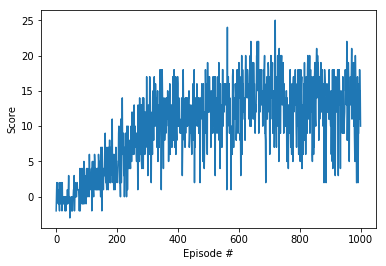


-----Training for 1000 episodes with [16,8] hidden layers-----

Episode 100	Average Score: 0.26
Episode 200	Average Score: 1.36
Episode 300	Average Score: 4.13
Episode 400	Average Score: 9.11
Episode 500	Average Score: 11.71
Episode 600	Average Score: 12.78
Episode 644	Average Score: 13.04
Environment solved in 544 episodes!
	Average Score: 13.04

Saving current network state.
Episode 645	Average Score: 13.11
Saving current network state.
Episode 648	Average Score: 13.18
Saving current network state.
Episode 649	Average Score: 13.19
Saving current network state.
Episode 659	Average Score: 13.22
Saving current network state.
Episode 665	Average Score: 13.22
Saving current network state.
Episode 675	Average Score: 13.22
Saving current network state.
Episode 676	Average Score: 13.26
Saving current network state.
Episode 677	Average Score: 13.27
Saving current network state.
Episode 678	Average Score: 13.37
Saving current network state.
Episode 679	Average Score: 13.38
Saving current netw

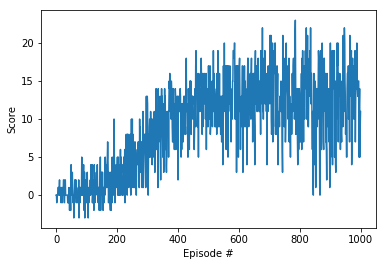

In [7]:
n_episodes = 1000
eps_decay = 0.995
layers_experiment = [[64],[256,128,64],[16,8]]
for layers in layers_experiment:
    agent = Agent(state_size=state_size, action_size=action_size, seed=0, hidden_layers=layers)
    print('\n-----Training for {0} episodes with [{1}] hidden layers-----\n'.format(n_episodes, ','.join(str(e) for e in layers)))
    scores = navigate(agent = agent, n_episodes = n_episodes, eps_decay = eps_decay, experiment = True)

    # plot the scores
    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.plot(np.arange(len(scores)), scores)
    plt.ylabel('Score')
    plt.xlabel('Episode #')
    plt.savefig('images/average_scores_plot_{0}_{1}.png'.format(n_episodes,'_'.join(str(e) for e in layers)))
    plt.show()

## Run trained agent

In [8]:
print('\n-----Trained agent navigating over a single 100 episode window-----\n'.format(eps_decay))
agent = Agent(state_size=state_size, action_size=action_size, seed=0, filename='checkpoint_dqn.pth')
scores = navigate(agent, n_episodes=100, train=False)


-----Trained agent navigating over a single 100 episode window-----

Episode 100	Average Score: 15.39


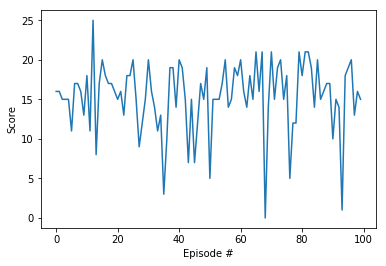

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.savefig('images/average_scores_plot_{}_{}.png'.format(n_episodes,eps_decay))
plt.show()

## Close the environment

In [10]:
env.close()